# Initialize

In [281]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Data Cleaning

In [187]:
# Load csv dataset
df = pd.read_csv("Data Assets/heart.csv")

# Rename columns for better understanding
df.rename(columns={
    'cp': 'chest_pain_type',
    'trestbps': 'resting_blood_pressure',
    'chol': 'serum_cholesterol',
    'fbs': 'fasting_blood_sugar',
    'restecg': 'resting_ecg_result',
    'thalach': 'max_heart_rate_achieved',
    'exang': 'exercise_induced_angina',
    'oldpeak': 'st_depression_exercise_vs_rest',
    'slope': 'slope_peak_exercise_st_segment',
    'ca': 'num_major_vessels_colored_by_fluoro',
    'thal': 'thalassemia_blood_disorder'
}, inplace=True)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [254]:
# Check for any null values
df.isna().sum()

age                                    0
sex                                    0
chest_pain_type                        0
resting_blood_pressure                 0
serum_cholesterol                      0
fasting_blood_sugar                    0
resting_ecg_result                     0
max_heart_rate_achieved                0
exercise_induced_angina                0
st_depression_exercise_vs_rest         0
slope_peak_exercise_st_segment         0
num_major_vessels_colored_by_fluoro    0
thalassemia_blood_disorder             0
target                                 0
dtype: int64

# Predictive Module Creation

In [197]:
# Set numerical fields as features (all but 'target' in this case)
features = df.drop(columns=['target'])

# Set 'target' as target
target = df['target']

In [242]:
# Split the dataset into training and testing sets
# X_train, X_test: Features for training and testing
# y_train, y_test: Target (labels) for training and testing
# test_size=0.25 means 25% of the data will be used for testing, and 75% for training
# random_state=42 ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

# Create a K-Nearest Neighbors (KNN) classifier model
# n_neighbors=3 means the model will consider the 3 nearest neighbors to make a prediction
knn = KNeighborsClassifier(n_neighbors=3)

# Train (fit) the KNN model using the training data (X_train and y_train)
# This step involves learning from the training data and creating the model
knn.fit(X_train, y_train)

In [256]:
# Use the trained K-Nearest Neighbors (KNN) model to make predictions on the test data (X_test)
# The model predicts the target values (heart disease presence) for the input features (X_test)
pred = knn.predict(X_test)

# Display the predictions made by the KNN model on the test set
pred

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1])

In [250]:
# Display the y_test values
y_test.values

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1])

In [258]:
# Evaluate the performance of the trained K-Nearest Neighbors (KNN) model on the test set
# The `score()` method calculates the accuracy of the model by comparing the predicted values to the actual values
knn.score(X_test, y_test)

0.6710526315789473

In [287]:
from sklearn.metrics import classification_report

# Calculate the predicted values for the test set
pred = knn.predict(X_test)

# Generate the classification report, which includes precision, recall, and F1-score
# The report will show these metrics for each class (0 and 1 in a binary classification problem)
report = classification_report(y_test, pred, output_dict=True)

# Convert the dictionary to a pandas DataFrame for better readability
report_df = pd.DataFrame(report).transpose()

## Prediction Outcomes

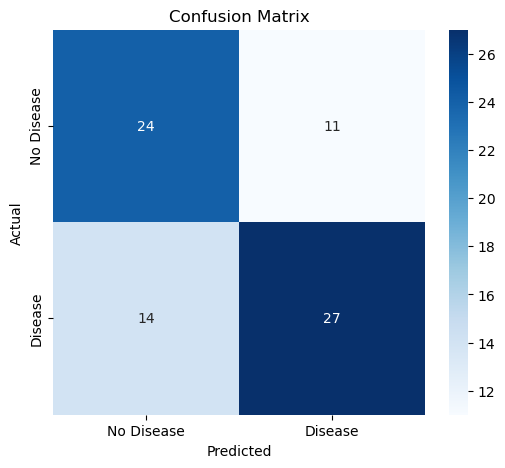

(None,
               precision    recall  f1-score    support
 0              0.631579  0.685714  0.657534  35.000000
 1              0.710526  0.658537  0.683544  41.000000
 accuracy       0.671053  0.671053  0.671053   0.671053
 macro avg      0.671053  0.672125  0.670539  76.000000
 weighted avg   0.674169  0.671053  0.671566  76.000000)

In [293]:
# Get predictions from the model
pred = knn.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])

# Adding labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show(), report_df